In [18]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
data = pd.read_csv("housing.csv") ## Reading the housing data from the keggle csv file
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [20]:
data.info() ## Here we are checking if we have any null values and as we can see we have some here in the total bedrooms

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [21]:
## Now we will use the dropna and ddrop those null values and why we are doing this as the number of values loosing is very less 

'''
Minimal Missing Data:

If the proportion of missing values is extremely small (e.g., <5%), dropping rows/columns won't significantly impact the dataset.
Unimportant Features:

If a column has many missing values and isn't critical to the problem, you can drop the entire column.
'''

data.dropna(inplace=True) ## And this inplace = True will save the removed data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [22]:
## Now what we are going to do is splitting the data into training and testing data and test it into x and y data
## As we saw in regression we want to split one part of data and use it for training and use the second set for evaluating the result 


## Using the Scikit-learn
from sklearn.model_selection import train_test_split

x = data.drop(['median_house_value'],axis=1) ## Here we split the x value and dropped the Median house value
y = data['median_house_value'] ## And here we set the y value to Median House Value

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2) ## So we are splitting the X and Y along with this the test data size will be just 20% and the samples will be slected at random


In [23]:
## Now here we are seeing the total traning data where, before we removed the median house price now we have joined that
## As we have seen we divided the traning data into two parts X and Y , now we have joined the traning part of it together
train_data = x_train.join(y_train)

In [24]:
## Now we also need to consider the "Ocean_Proximity" feature which could be important and is also important
## How we could now convert it to numbers is by doing "One Hot Encoding"
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity,dtype=int)).drop(['ocean_proximity'],axis = 1)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
886,-121.98,37.54,17.0,5133.0,1375.0,3386.0,1339.0,3.1326,220800.0,1,0,0,0,0
1296,-121.81,37.99,22.0,2331.0,359.0,1086.0,340.0,5.1435,150800.0,0,1,0,0,0
679,-122.15,37.68,35.0,2632.0,447.0,1349.0,486.0,4.3864,205200.0,0,0,0,1,0
10571,-117.67,33.66,4.0,10175.0,2181.0,4762.0,1929.0,4.7341,237400.0,1,0,0,0,0
308,-122.18,37.77,51.0,2107.0,471.0,1173.0,438.0,3.2552,120100.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14525,-117.13,32.92,16.0,2173.0,399.0,1460.0,393.0,4.2614,169600.0,1,0,0,0,0
13948,-117.17,34.25,15.0,4236.0,753.0,703.0,255.0,3.5625,165500.0,0,1,0,0,0
412,-122.28,37.89,52.0,2315.0,408.0,835.0,369.0,4.5893,290100.0,0,0,0,1,0
10206,-117.93,33.88,32.0,2458.0,359.0,967.0,409.0,7.2893,293500.0,1,0,0,0,0


<Axes: >

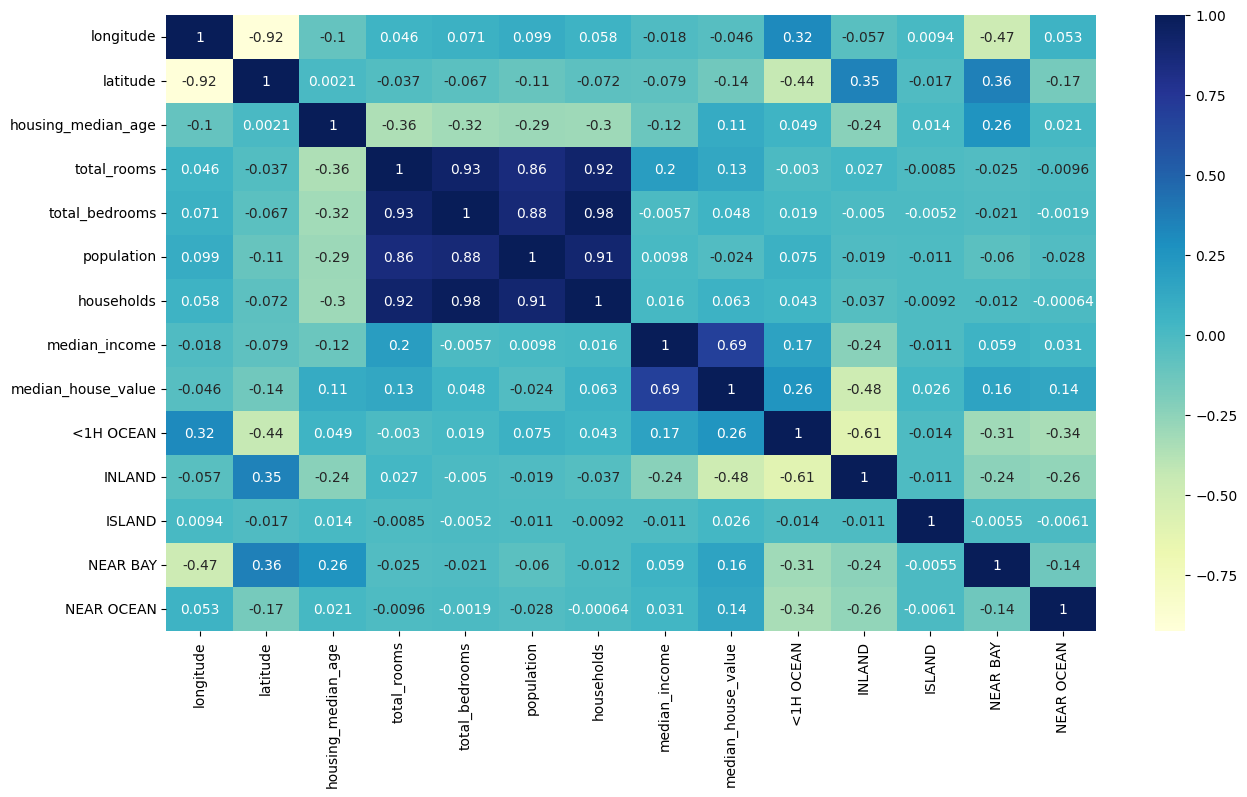

In [25]:
## Now after this what we can do is create a co relation heatmap with the target variable to able to anaylse 
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

<Axes: >

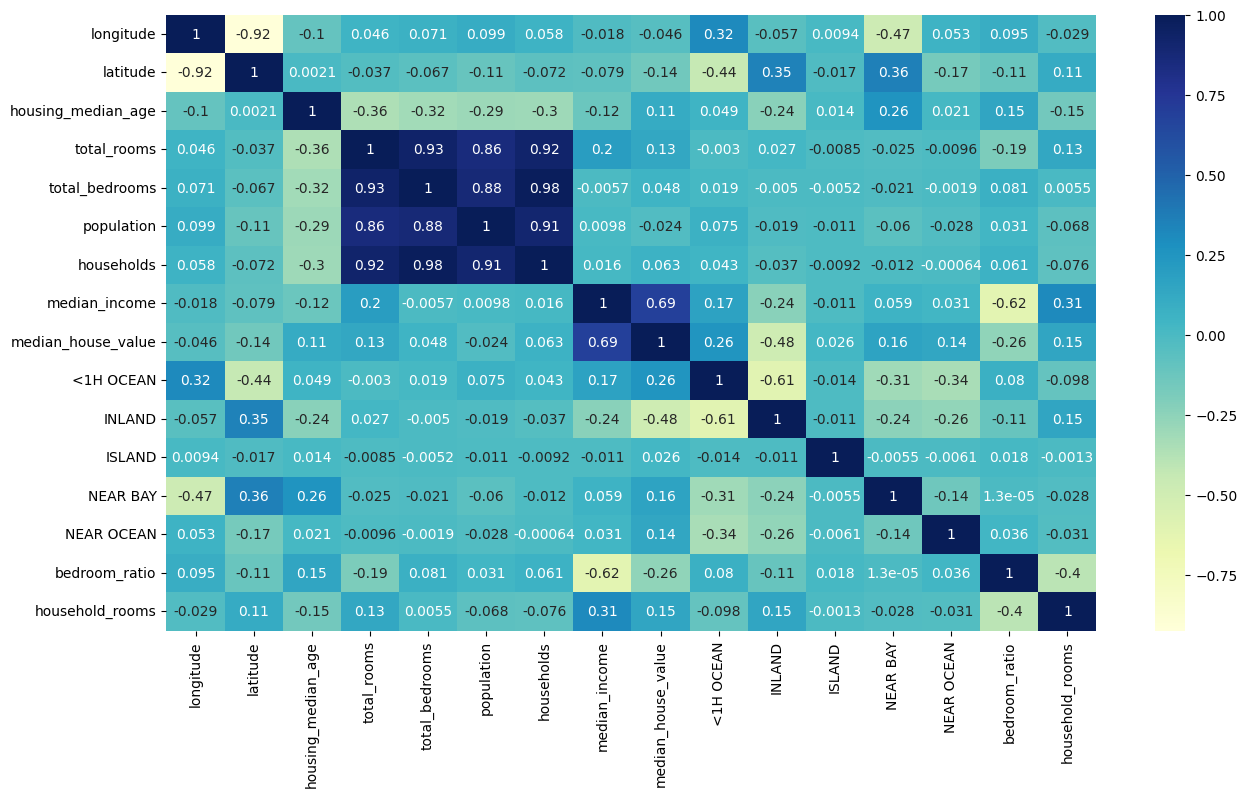

In [26]:
## Now we can do feature enginerring where now we will see and combine few of these features together
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']

## Now after this what we can do is create a co relation heatmap with the target variable to able to anaylse 
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

In [27]:
## Now we will train a simple linear regression model
from sklearn.linear_model import LinearRegression

x_train,y_train = train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']

reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [28]:
test_data = x_test.join(y_test)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity,dtype=int)).drop(['ocean_proximity'],axis = 1)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/test_data['households']

In [29]:
x_test,y_test = test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']

In [30]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
reg.score(x_test,y_test)


Model Performance:
Mean Squared Error (MSE): 4414292442.61
Root Mean Squared Error (RMSE): 66440.14
R² Score: 0.65


0.6546760590368639

Random Forest Regressor

In [31]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train,y_train)

RandomForestRegressor()

In [32]:
forest.score(x_test,y_test)

0.8204929603025477